# Final project

## preamble

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import random
import time
import os

import finalProject as fp


%reload_ext autoreload
%autoreload 2

## Game Init

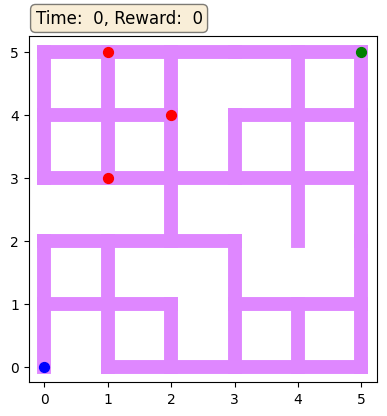

In [427]:
game = fp.Game(size=6,
    goalValue=0,
    packageValue=50,
    nPackages=3,
    timePenalty=5,
    invalidMovePenalty=10
)
fig, axes = game.plot()
plt.show()

## Solve

In [428]:
start = time.time()
policy, valueFunction = fp.optimalPolicyGet(game, gamma=0.999)
end = time.time()
print(f"time taken: {end-start:.4f}")

time taken: 101.5017


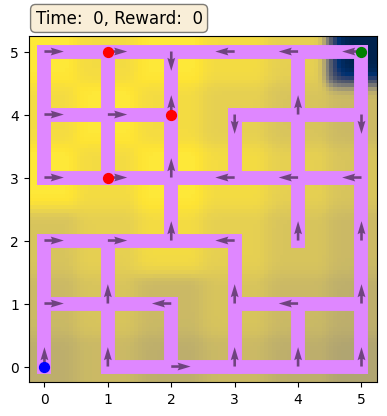

In [434]:
fig, axes = fp.RLplot(game,valueFunction,policy)
plt.show()

In [435]:
# necessary directories are created
os.system('mkdir -p anims')
os.system('mkdir frames')

# a copy of the game is created
auxGame = game.copy()
tickId = 0
# fig, axes = auxGame.plot()
fig, axes = fp.RLplot(auxGame,valueFunction,policy)
plt.savefig(f"frames/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
plt.close()
while not auxGame.walker.goalReached and tickId < game.maze.size**2:
    tickId+=1
    # the walker is moved according to policy
    auxGame.moveWalker(policy[fp.stateId(auxGame)])
    # the game plot is created and saved
    # fig, axes = auxGame.plot()
    fig, axes = fp.RLplot(auxGame,valueFunction,policy)
    plt.savefig(f"frames/{tickId}.png", format="png", dpi=300, bbox_inches="tight")
    plt.close()
    # some logs to know something is happening
    print(f'\r{tickId}', end='', flush=True)
print('\r'+' '*10, end='', flush=True)

# ffmpeg is used to create the animation
os.system('ffmpeg -framerate 3 -i frames/%d.png -vf "scale=trunc(iw/2)*2:trunc(ih/2)*2" -c:v libx264 -pix_fmt yuv420p -loglevel quiet aux.mp4')
os.system('ffmpeg -loglevel quiet -i aux.mp4 -r 30 anims/$(date +%m%d%H%M%S).mp4')
os.system('rm aux.mp4')

# the directory with the frames is erased
os.system(f'rm -r frames')

0